## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

number of observations = 130


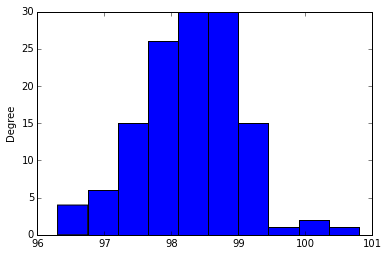

In [15]:
print "number of observations = %s" % len(df)
df.temperature.plot(kind='hist');

1) conditions for normal distribution:
    * independence: Since the sample is a random sample and contains < 10% of the population, the observations are independent.
    * sample size and skew: This is a large sample (130 observations) > 30, hence any skew seen would not be strong.
    
**Hence, the distribution of body temperatures does seem to be normal.**

2) Since the sample size is large (130 observations > 30), we can use the z-test

* Set Hypothesis:
    * H0: (population mean) M = 98.6 degree fahrenheit
    * HA: (population mean) M != 98.6 degree fahrenheit
* Find the test statistic z: (found in next cell)
    


In [83]:
x = round(df.temperature.mean(),2)
s = round(df.temperature.std(),2)
SE = round((df.temperature.std() / np.sqrt(len(df))),2)
M = 98.6
z = round((x - M)/SE,2)

print "sample mean (m) = %s" % x
print "sample standard deviation (s) = %s" % s
print "sample standard error (SE) = s/root(n) = %s" % SE
print "\n\ntest statistic z = %s" % z

sample mean (m) = 98.25
sample standard deviation (s) = 0.73
sample standard error (SE) = s/root(n) = 0.06


test statistic z = -5.83


p-value for 2-sided test = 0.0


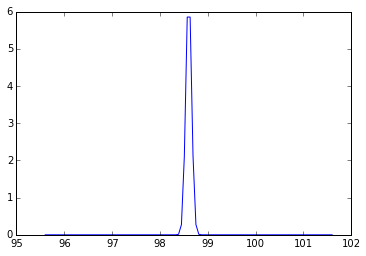

In [129]:
import scipy.stats as st
from scipy.stats import norm

l = np.linspace(-3+M,3+M,100)
plt.plot(l,norm.pdf(l,M,SE));

print "p-value for 2-sided test = %s" % round(2*st.norm.cdf(z),4)

* with the above p-value < 0.05, we have strong evidence in favor of the alternative hypothesis. 

**Hence we reject the null hypothesis in favor of the alternative and conclude that the data provides convincing evidence that the true population mean for body temperatures is different than 98.6 degrees Fahrenheit.**

3) Let us compute the margin of error and the 95% confidence interval for a sample mean in the next cell:

In [88]:
# margin of error = z*s (z = 1.96 for 95% confidence interval)
me = round(1.96 * s,2)
print "margin of error = %s" % me

# confidence interval (ci) = x +- z*SE
pci = x + me
nci = x - me

print "confidence interval (ci) = (%s, %s)" % (nci, pci)

margin of error = 1.43
confidence interval (ci) = (96.82, 99.68)


From the calculations in the above cell, we are 95% confident that the observations for body temperature would fall between 96.82 and 99.68.

**Based on our confidence interval above, any temperature below 96.82 or above 99.68 would be considered abnormal.**

In [100]:
dfm = df[df.gender == 'M']
dff = df[df.gender == 'F']

4) Since the sample size is large (65 observations > 30), we can use the z-test

* Set Hypothesis:
    * H0: (difference in population means) Mmale - Mfemale = 0
    * HA: (difference in population means) Mmale - Mfemale != 0
* Find the test statistic z: (found in next cell)
    


In [131]:
Mdiff = 0
xdiff = round(dfm.temperature.mean(),2) - round(dff.temperature.mean(),2)
SEdiff = round(np.sqrt(((dfm.temperature.std() ** 2) / len(dfm)) + ((dff.temperature.std() ** 2) / len(dff))),2)
zdiff = round((xdiff - Mdiff)/SEdiff,2)

print "sample mean (m) = %s" % xdiff
print "sample standard error (SE) = root((smale^2/nmale) + (sfemale^2/nfemale) = %s" % SEdiff
print "\n\ntest statistic z = %s" % zdiff

sample mean (m) = -0.29
sample standard error (SE) = root((smale^2/nmale) + (sfemale^2/nfemale) = 0.13


test statistic z = -2.23


p-value for 2-sided test = 0.0257


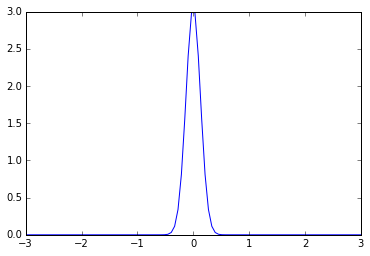

In [132]:
l = np.linspace(-3+Mdiff,3+Mdiff,100)
plt.plot(l,norm.pdf(l,Mdiff,SEdiff));

print "p-value for 2-sided test = %s" % round(2*st.norm.cdf(zdiff),4)

* with the above p-value < 0.05, we have strong evidence in favor of the alternative hypothesis. 

**Hence we reject the null hypothesis in favor of the alternative and conclude that the data provides convincing evidence that the average body temperature of males is different than the average body temperature of females.**

* Checking for the 95% confidence interval for temperatures for both males and females to be able to compare how much difference exists between them.

In [124]:
mediff = 1.96 * SEdiff
pcidiff = xdiff + mediff
ncidiff = xdiff - mediff

print "The confidence interval is (%s, %s)" % (ncidiff, pcidiff)

The confidence interval is (-0.5448, -0.0352)


**Based on the calculations in the above cell, the average male body temperature will be 0.0352 to 0.5448 degree Fahrenheit lower than the female body temperature.**